In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:

data=pd.read_csv("ACME-HappinessSurvey2020.csv")
print(data.shape)

(126, 7)


In [42]:
data['X1'].value_counts()

5    65
4    40
3    20
1     1
Name: X1, dtype: int64

In [43]:
data['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

In [44]:
filt=((data['Y']==1) & (data['X1']>3))
yes = data[filt]

In [45]:
yes = data[filt]
yes.count

<bound method DataFrame.count of      Y  X1  X2  X3  X4  X5  X6
2    1   5   3   3   3   3   5
5    1   5   5   3   5   5   5
7    1   5   4   4   4   4   5
12   1   5   2   4   5   5   5
17   1   5   1   4   3   4   5
..  ..  ..  ..  ..  ..  ..  ..
118  1   4   3   3   4   4   4
119  1   5   5   1   1   5   1
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5

[61 rows x 7 columns]>

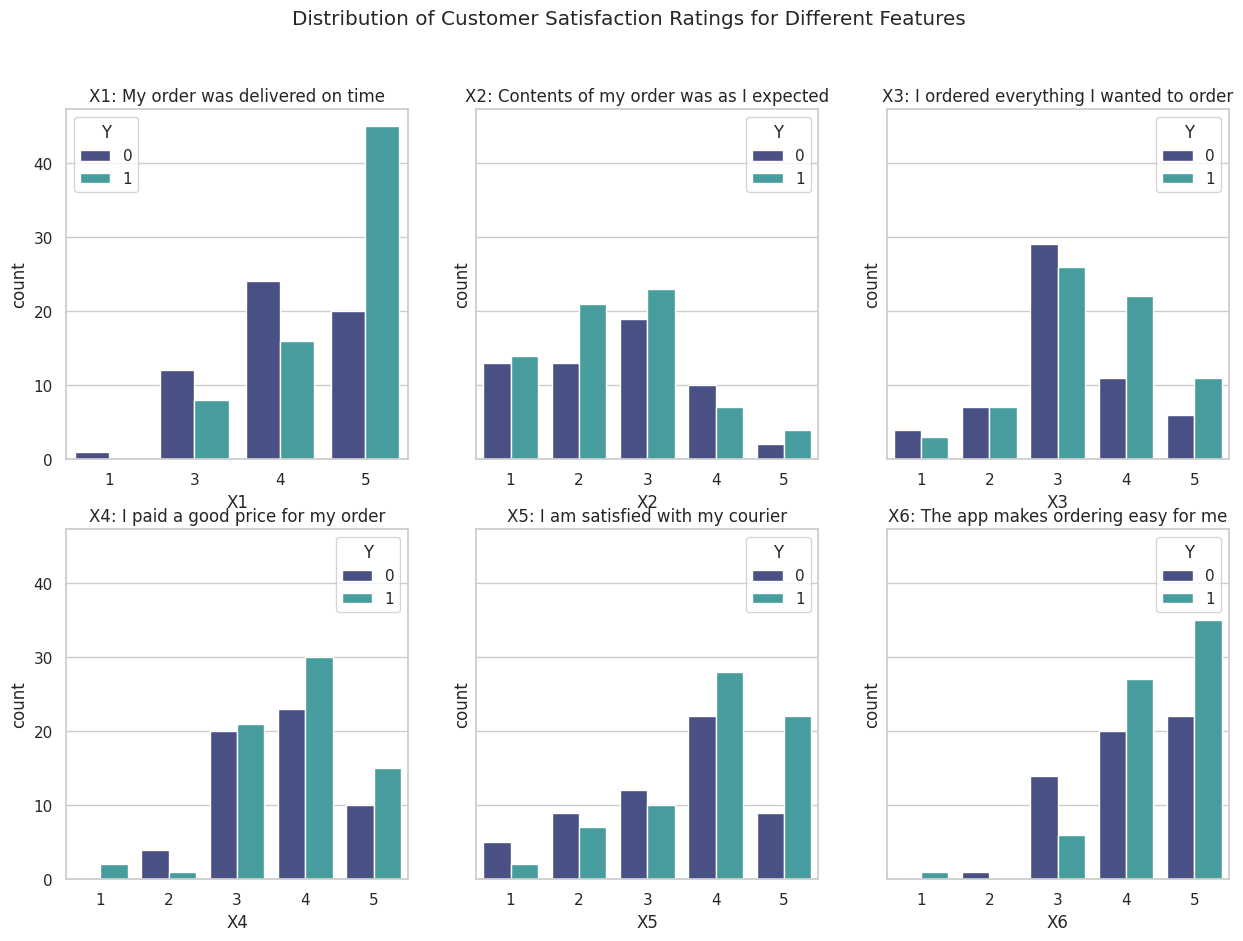

In [47]:
fig , axes = plt.subplots(2,3, sharey= True, figsize = (15,10))
fig.suptitle('Distribution of Customer Satisfaction Ratings for Different Features')

sns.countplot(ax = axes[0,0], x=data['X1'], hue=data['Y'], palette='mako')
axes[0,0].set_title('X1: My order was delivered on time')

sns.countplot(ax = axes[0,1], x=data['X2'], hue=data['Y'], palette='mako')
axes[0,1].set_title('X2: Contents of my order was as I expected')

sns.countplot(ax = axes[0,2], x=data['X3'], hue=data['Y'], palette='mako')
axes[0,2].set_title('X3: I ordered everything I wanted to order')

sns.countplot(ax = axes[1,0], x=data['X4'], hue=data['Y'], palette='mako')
axes[1,0].set_title('X4: I paid a good price for my order')

sns.countplot(ax = axes[1,1], x=data['X5'], hue=data['Y'], palette='mako')
axes[1,1].set_title('X5: I am satisfied with my courier')

sns.countplot(ax = axes[1,2], x=data['X6'], hue=data['Y'], palette='mako')
axes[1,2].set_title('X6: The app makes ordering easy for me')

plt.show();

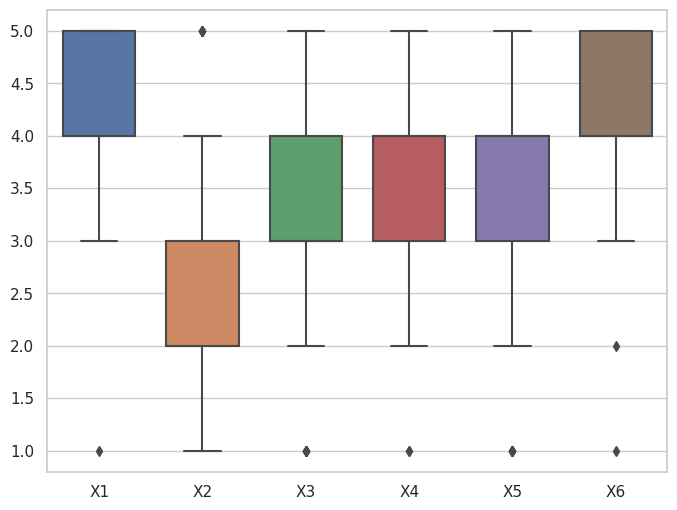

In [22]:
df=data.drop('Y', axis=1)
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=df, width=0.7)


Correlation

In [48]:
respo=data.iloc[:,1:6].values
respo_name=['X1','X2','X3','X4','X5','X6']
y=data.iloc[:,0].values

In [49]:
X1=data['X1']
X2=data['X2']
X3=data['X3']
X4=data['X4']
X5=data['X5']
X6=data['X6']

data.corr(numeric_only=True, method='spearman')

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.291458,-0.034304,0.162199,0.081398,0.227306,0.174114
X1,0.291458,1.000000,0.015683,0.228081,0.065851,0.422786,0.512855
X2,-0.034304,0.015683,1.000000,0.156817,0.136659,0.030070,-0.037147
X3,0.162199,0.228081,0.156817,1.000000,0.275266,0.406356,0.179754
X4,0.081398,0.065851,0.136659,0.275266,1.000000,0.305012,0.141381
X5,0.227306,0.422786,0.030070,0.406356,0.305012,1.000000,0.330066
X6,0.174114,0.512855,-0.037147,0.179754,0.141381,0.330066,1.000000


<Axes: >

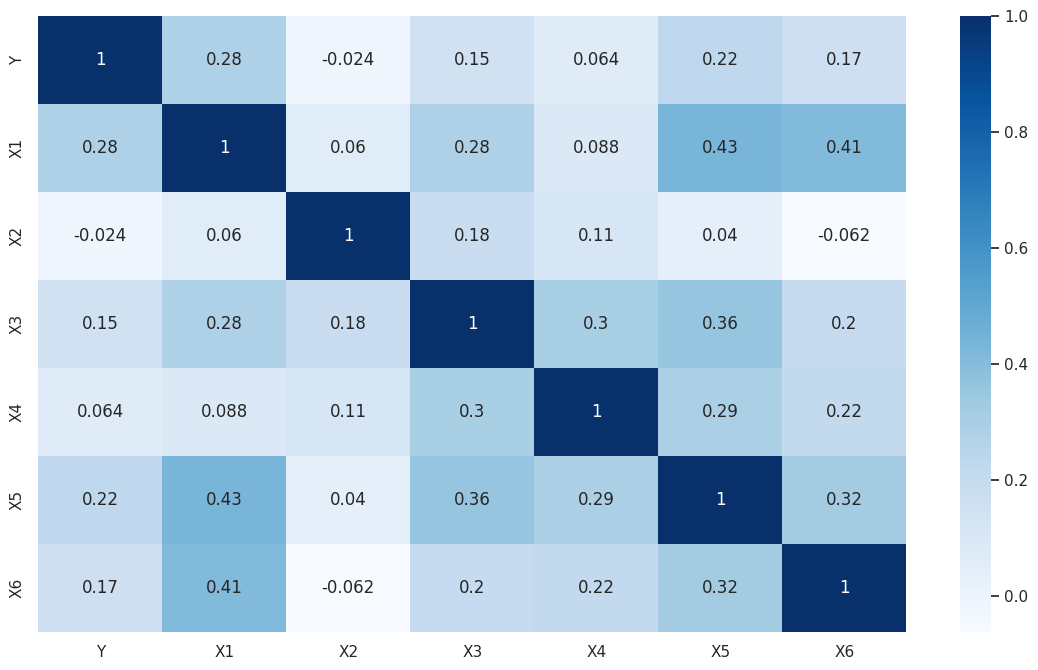

In [50]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

In [51]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          Y     X1     X2     X3     X4     X5     X6
0    False  False  False  False  False  False  False
1    False  False  False  False  False  False  False
2    False  False  False  False  False  False  False
3    False  False  False  False  False  False  False
4    False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...
121  False  False  False  False  False  False  False
122  False  False  False  False  False  False  False
123  False  False  False  False  False  False  False
124  False  False  False  False  False  False  False
125  False  False  False  False  False  False  False

[126 rows x 7 columns]>

LOGISTIC REGRESSION

In [52]:
X = data.drop('Y', axis=1)
y = data['Y']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [53]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 6) (100,)
(26, 6) (26,)


Feature: 0, Score: 0.43870
Feature: 1, Score: -0.09789
Feature: 2, Score: 0.09092
Feature: 3, Score: -0.07306
Feature: 4, Score: 0.23855
Feature: 5, Score: 0.11672


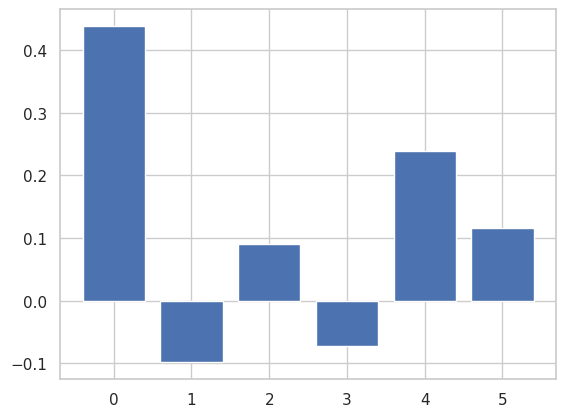

In [54]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)
importance = logmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [55]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.85      0.65      0.73        17

    accuracy                           0.69        26
   macro avg       0.69      0.71      0.68        26
weighted avg       0.74      0.69      0.70        26

Accuracy: 0.6923076923076923


Feature Selection

In [57]:
top_3_features = data.drop(['X4', 'X5', 'X6'], axis = 1)
top_3_features
X_imp = top_3_features.drop('Y', axis = 1)
y_imp = top_3_features['Y']
Ximp_train, Ximp_test, yimp_train, yimp_test = train_test_split(X_imp.values, y_imp.values, test_size = 0.2, random_state = 10)
logmodel = LogisticRegression()
logmodel.fit(Ximp_train, yimp_train)
yimp_pred = logmodel.predict(Ximp_test)
print(classification_report(yimp_test,yimp_pred))
print("Accuracy:",accuracy_score(yimp_test, yimp_pred))


              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.80      0.71      0.75        17

    accuracy                           0.69        26
   macro avg       0.67      0.69      0.68        26
weighted avg       0.71      0.69      0.70        26

Accuracy: 0.6923076923076923


In [58]:
top_4_features = data.drop(['X4', 'X5'], axis = 1)
X_imp = top_4_features.drop('Y', axis = 1)
y_imp = top_4_features['Y']
Ximp_train, Ximp_test, yimp_train, yimp_test = train_test_split(X_imp.values, y_imp.values, test_size = 0.2, random_state = 10)
logmodel = LogisticRegression()
logmodel.fit(Ximp_train, yimp_train)
yimp_pred = logmodel.predict(Ximp_test)
print(classification_report(yimp_test,yimp_pred))
print("Accuracy:",accuracy_score(yimp_test, yimp_pred))



              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.80      0.71      0.75        17

    accuracy                           0.69        26
   macro avg       0.67      0.69      0.68        26
weighted avg       0.71      0.69      0.70        26

Accuracy: 0.6923076923076923


In [59]:
top_5_features = data.drop(['X4'], axis = 1)
X_imp = top_5_features.drop('Y', axis = 1)
y_imp = top_5_features['Y']
Ximp_train, Ximp_test, yimp_train, yimp_test = train_test_split(X_imp.values, y_imp.values, test_size = 0.2, random_state = 10)
logmodel = LogisticRegression()
logmodel.fit(Ximp_train, yimp_train)
yimp_pred = logmodel.predict(Ximp_test)
print(classification_report(yimp_test,yimp_pred))
print("Accuracy:",accuracy_score(yimp_test, yimp_pred))


              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.85      0.65      0.73        17

    accuracy                           0.69        26
   macro avg       0.69      0.71      0.68        26
weighted avg       0.74      0.69      0.70        26

Accuracy: 0.6923076923076923


DECISION TREE

In [23]:
X = data.drop('Y', axis=1)
y = data['Y']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print(X_test)

     X1  X2  X3  X4  X5  X6
24    4   3   3   3   3   4
125   5   3   2   5   5   5
13    4   2   4   5   4   3
96    4   4   3   4   3   3
73    5   2   3   3   2   5
3     5   4   3   3   3   5
22    4   3   5   5   5   4
9     4   4   4   2   5   5
2     5   3   3   3   3   5
81    3   3   3   3   3   4
47    1   1   1   3   1   4
1     3   2   3   5   4   3
51    5   1   3   3   4   4
48    5   2   5   5   5   3
10    3   2   3   3   2   3
101   5   3   4   3   4   3
90    3   4   5   4   5   4
29    5   3   3   3   5   3
32    3   2   4   4   4   5
11    4   4   3   4   4   4
56    5   1   1   5   3   5
74    5   2   5   5   5   5
44    3   1   2   4   3   5
104   4   1   3   5   3   5
18    5   1   2   4   4   5
69    5   4   5   5   5   5


Feature: 0, Score: 0.17268
Feature: 1, Score: 0.16443
Feature: 2, Score: 0.15416
Feature: 3, Score: 0.12043
Feature: 4, Score: 0.17910
Feature: 5, Score: 0.20920


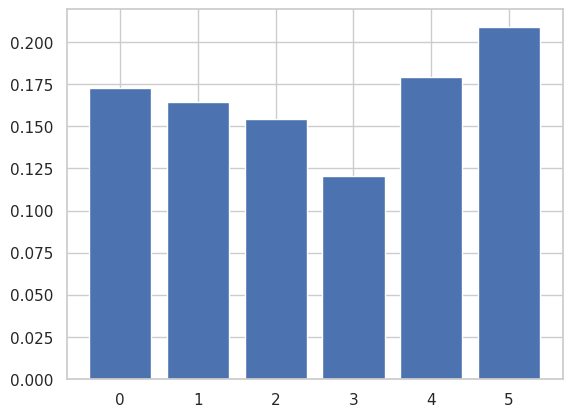

In [25]:
# get importance
importance = dtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [41]:
y_predict =dtree.predict(X_test)
print('Accuracy =' , metrics.accuracy_score(y_predict, y_test))


Accuracy = 0.8461538461538461


XGBOOST CLASSIFIER

Feature: 0, Score: 0.23173
Feature: 1, Score: 0.10262
Feature: 2, Score: 0.16110
Feature: 3, Score: 0.15928
Feature: 4, Score: 0.13552
Feature: 5, Score: 0.20975


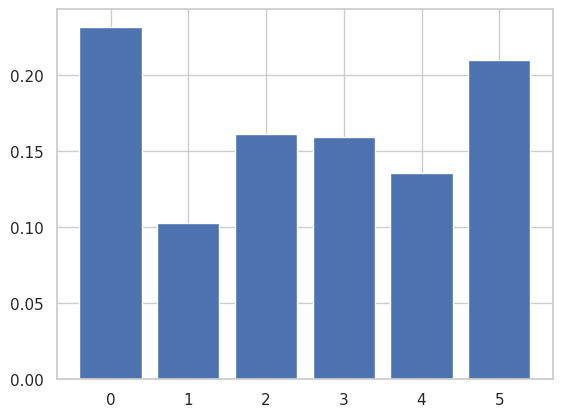

Accuracy = 0.6923076923076923


In [40]:
from xgboost import XGBClassifier



model = XGBClassifier()
# fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
y_predict =model.predict(X_test)
print('Accuracy =' , metrics.accuracy_score(y_predict, y_test))


Conclusion:
From above three classifier both logistic regression and xgbooster classifier gives a maximum of accuracy 69.23 percentage. The Decision tree is giving a accuracy of 84.61. The classifier can be further improved by getting more feedback from the customer since the data is limited even one mistake can cause a drastic impact in the accuracy. Also as for the Feature selection we can see that X1(My order was delivered on time),X2(Contents of my order is as expected),X3(I ordered everything I wanted to order) are best 3 features and X1 and X3 can be taken as best 2 features. Since the data is limited the model is created hence the best model is created with it. 